# Импорт библиотек


In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [2]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [4]:
df_habr = pd.read_csv("habr.csv")

In [5]:
df_habr.head(3)

Unnamed: 0                                          Заголовок  \
0           0  Готовимся к встрече с Python 3.14: разбор супе...   
1           1                Разворачиваем GitLab за пару кликов   
2           2  Я — редактор. И боюсь, что меня заменит нейросеть   

  Название компании                                          Описание  \
0               МТС                         Про жизнь и развитие в IT   
1              OTUS              Цифровые навыки от ведущих экспертов   
2       Minervasoft  Платформа управления знаниями для команд и GenAI   

   Рейтинг                                          Категория        Дата  \
0  2354.20  Связь и телекоммуникации, Мобильные технологии...  2025-04-28   
1   529.34  Консалтинг и поддержка, Рекрутинг и HR, Произв...  2025-04-28   
2   279.27  Программное обеспечение, Поисковые технологии,...  2025-04-28   

                                               Текст  
0  Всем привет! С вами Леша Жиряков, техлид backe...  
1  GitLab является одним из самых популярных инст...  
2  Я помню, как весной 2024 года ИИ едва выдавал ...

In [6]:
df_pdf = pd.read_csv("PDFParsed.csv")

In [7]:
df_pdf.head(3)

Заголовок  \
0  предназначенная для организации хранилищ данны...   
1              Cocoapods, Carthage, SPM: как выбрать   
2  как даже давние игроки видят в нем спасительно...   

            Название компании                                      Описание  \
0                        OTUS          Цифровые навыки от ведущих экспертов   
1               red_mad_robot  №1 в разработке цифровых решений для бизнеса   
2  Технократия @technokratiya                                   ИТ-Компания   

   Рейтинг                   Категория            Дата  \
0   721.07                        OTUS   7 часов назад   
1   117.94               red_mad_robot   6 часов назад   
2     4.40  Технократия @technokratiya             NaN   

                                               Текст  
0  Подписаться Автор оригинала: Jingyu Wang Green...  
1  FAQ Старший iOS-разработчик Аня Кочешкова расс...  
2  Еще до начала MWC в Барселоне было очевидно, ч...

In [8]:
df_json = pd.read_csv("ParsedJsons.csv")

In [9]:
df_json.head(3)

Заголовок       Название компании  \
0        NaN  Cybersport.Metaratings   
1        NaN         ESforce Holding   
2        NaN         ESforce Holding   

                                            Описание  Рейтинг Категория  \
0  Информационный сайт, который ежедневно публику...      NaN       NaN   
1  Одна из крупнейших киберспортивных организаций...      NaN       NaN   
2  Одна из крупнейших киберспортивных организаций...      NaN       NaN   

              Дата                                              Текст  
0  8 декабря 09:30  7 декабря состоялась церемония награждения лау...  
1  8 декабря 09:30  7 декабря состоялась церемония награждения лау...  
2    29 июля 13:50  Из совместного исследования издателя компьютер...

#### Соединение всех дата сетов в один 

In [10]:
df = pd.concat([df_pdf, df_json, df_habr], axis=0, ignore_index=True)

#### Описание набора данных

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Заголовок          50 non-null     object 
 1   Название компании  1162 non-null   object 
 2   Описание           1162 non-null   object 
 3   Рейтинг            343 non-null    float64
 4   Категория          343 non-null    object 
 5   Дата               1155 non-null   object 
 6   Текст              1162 non-null   object 
 7   Unnamed: 0         30 non-null     float64
dtypes: float64(2), object(6)
memory usage: 72.8+ KB


#### Предварительная обработка данных

* Перевод всех букв в тексте в нижний регистр
* Удаление знаков препинания
* Токенизация по словам
* Удаление стоп слов
* Стемминг (приведение слов к нормальной форме)
* Лемматизация

In [12]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

def remove_english(text):
    return re.sub(r'[a-zA-Z]', '', text)

#### Добавление нового столбца, отображающий обработанный текст

In [13]:
df['Обработанный текст'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(remove_english(text.lower()))))) for text in df['Текст']]

In [14]:
df

Заголовок  \
0     предназначенная для организации хранилищ данны...   
1                 Cocoapods, Carthage, SPM: как выбрать   
2     как даже давние игроки видят в нем спасительно...   
3                                 Cloud4Y 5 часов назад   
4     работы. Инструмент достаточно пожилой (первый ...   
...                                                 ...   
1157  В центре внимания Java: Local Variable Type In...   
1158  Первые вызовы и много шуток: что скрыто в бесп...   
1159                          Мой путь к удаленке в Гоа   
1160  Единый механизм указания значений по умолчанию...   
1161  Введение в концепцию «потока» в левел-дизайне ...   

               Название компании  \
0                           OTUS   
1                  red_mad_robot   
2     Технократия @technokratiya   
3                        Cloud4Y   
4             Alex Kup @Lifailon   
...                          ...   
1157                   Axiom JDK   
1158            Яндекс Практикум   
1159               Online patent   
1160                       Флант   
1161                        OTUS   

                                               Описание  Рейтинг  \
0                  Цифровые навыки от ведущих экспертов   721.07   
1          №1 в разработке цифровых решений для бизнеса   117.94   
2                                           ИТ-Компания     4.40   
3                   #1 Корпоративный облачный провайдер    71.07   
4     источников журналов (не только файлов), поддер...     2.00   
...                                                 ...      ...   
1157                        на страже безопасности Java    75.61   
1158                               Помогаем людям расти   105.08   
1159                          Ваш личный патентный офис   290.95   
1160                 Специалисты по DevOps и Kubernetes   245.51   
1161               Цифровые навыки от ведущих экспертов   529.34   

                                              Категория            Дата  \
0                                                  OTUS   7 часов назад   
1                                         red_mad_robot   6 часов назад   
2                            Технократия @technokratiya             NaN   
3                                               Cloud4Y   5 часов назад   
4                                    Alex Kup @Lifailon             NaN   
...                                                 ...             ...   
1157  Программное обеспечение, Консалтинг и поддержк...      2025-04-28   
1158                        Веб-разработка, Веб-сервисы      2025-04-28   
1159                Консалтинг и поддержка, Веб-сервисы      2025-04-28   
1160  Программное обеспечение, Консалтинг и поддержк...      2025-04-28   
1161  Консалтинг и поддержка, Рекрутинг и HR, Произв...      2025-04-28   

                                                  Текст  Unnamed: 0  \
0     Подписаться Автор оригинала: Jingyu Wang Green...         NaN   
1     FAQ Старший iOS-разработчик Аня Кочешкова расс...         NaN   
2     Еще до начала MWC в Барселоне было очевидно, ч...         NaN   
3     Автор оригинала: Yashwant Singh Взлом Instagra...         NaN   
4     Всем привет! Я уже писал статью о различных сп...         NaN   
...                                                 ...         ...   
1157  Команда Axiom JDK подготовила перевод статьи п...        25.0   
1158  Привет! Это команда Яндекс Практикума. Первые ...        26.0   
1159  закат в АрамболеПривет, Habr! Меня зовут Ксени...        27.0   
1160  В Kubernetes важно правильно настроить Storage...        28.0   
1161  Методы проектирования эффективного потока уров...        29.0   

                                     Обработанный текст  
0     подписаться автор оригинала это массивно‑парал...  
1      старший разработчик аня кочешкова рассказывае...  
2     еще до начала в барселоне было очевидно что хо...  
3     автор оригинала взлом ‑аккаунта популярный зап...  
4     всем привет я уже писал статью о разл

#### Отображение первоначального текста, без обработки

In [15]:
df['Текст'][0]

'Подписаться Автор оригинала: Jingyu Wang Greenplum — это массивно‑параллельная (MPP) база данных с открытым исходным кодом, аналитики. Как и в случае с другими MPP‑СУБД, она требует регулярной оптимизации запросов, корректировки распределения ресурсов и защиты данных. В этой статье мы рассмотрим пять рекомендаций, обязательных для эффективного управления Greenplum. 1. Правильно подбирайте политику распределения данных Greenplum можно рассматривать как MPP‑адаптацию PostgreSQL. Она расширяет возможности PostgreSQL, внедряя в ее операции параллелизм. И чтобы обеспечить параллельное выполнение запросов Greenplum распределяет данные по множеству машин, называемых сегментами. Greenplum предоставляет пользователям возможность выбрать один из трех методов распределения данных: хэш, случайное и реплицированное распределение. По умолчанию Greenplum использует хэш‑распределение (hash distribution). Если пользователь создает таблицы без указания метода распределения, система автоматически распре

#### Отображение первоначального текста, с обработкой

In [16]:
df['Обработанный текст'][0]

'подписаться автор оригинала это массивно‑параллельная база данных с открытым исходным кодом аналитики как и в случае с другими ‑субд она требует регулярной оптимизации запросов корректировки распределения ресурсов и защиты данных в этой статье мы рассмотрим пять рекомендаций обязательных для эффективного управления правильно подбирайте политику распределения данных можно рассматривать как ‑адаптацию она расширяет возможности внедряя в ее операции параллелизм и чтобы обеспечить параллельное выполнение запросов распределяет данные по множеству машин называемых сегментами предоставляет пользователям возможность выбрать один из трех методов распределения данных хэш случайное и реплицированное распределение по умолчанию использует хэш‑распределение если пользователь создает таблицы без указания метода распределения система автоматически распределяет кортежи на основе первого хэшируемого столбца однако рекомендуется явно определять политику распределения при выборе хэш‑распределения важно в

#### Дальнейшая обработка текста

In [17]:
russian_stopwords = stopwords.words("russian")

In [18]:
russian_stopwords 

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [19]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который', 'которые', 'с','своём','всем','наш', 'свой']) 

In [20]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [21]:
df['Токенизированный текст'] = [tokenize(text) for text in df['Обработанный текст']]

In [22]:
df.head()

Заголовок  \
0  предназначенная для организации хранилищ данны...   
1              Cocoapods, Carthage, SPM: как выбрать   
2  как даже давние игроки видят в нем спасительно...   
3                              Cloud4Y 5 часов назад   
4  работы. Инструмент достаточно пожилой (первый ...   

            Название компании  \
0                        OTUS   
1               red_mad_robot   
2  Технократия @technokratiya   
3                     Cloud4Y   
4          Alex Kup @Lifailon   

                                            Описание  Рейтинг  \
0               Цифровые навыки от ведущих экспертов   721.07   
1       №1 в разработке цифровых решений для бизнеса   117.94   
2                                        ИТ-Компания     4.40   
3                #1 Корпоративный облачный провайдер    71.07   
4  источников журналов (не только файлов), поддер...     2.00   

                    Категория            Дата  \
0                        OTUS   7 часов назад   
1               red_mad_robot   6 часов назад   
2  Технократия @technokratiya             NaN   
3                     Cloud4Y   5 часов назад   
4          Alex Kup @Lifailon             NaN   

                                               Текст  Unnamed: 0  \
0  Подписаться Автор оригинала: Jingyu Wang Green...         NaN   
1  FAQ Старший iOS-разработчик Аня Кочешкова расс...         NaN   
2  Еще до начала MWC в Барселоне было очевидно, ч...         NaN   
3  Автор оригинала: Yashwant Singh Взлом Instagra...         NaN   
4  Всем привет! Я уже писал статью о различных сп...         NaN   

                                  Обработанный текст  \
0  подписаться автор оригинала это массивно‑парал...   
1   старший разработчик аня кочешкова рассказывае...   
2  еще до начала в барселоне было очевидно что хо...   
3  автор оригинала взлом ‑аккаунта популярный зап...   
4  всем привет я уже писал статью о различных спо...   

                              Токенизированный текст  
0  подписаться автор оригинала массивно‑параллель...  
1  старший разработчик аня кочешкова рассказывает...  
2  начала барселоне очевидно хотя оператор предст...  
3  автор оригинала взлом ‑аккаунта популярный зап...  
4  привет писал статью различных способах приходи...

In [23]:
df['Токенизированный текст'][0]

'подписаться автор оригинала массивно‑параллельная база данных открытым исходным кодом аналитики случае другими ‑субд требует регулярной оптимизации запросов корректировки распределения ресурсов защиты данных статье рассмотрим пять рекомендаций обязательных эффективного управления правильно подбирайте политику распределения данных рассматривать ‑адаптацию расширяет возможности внедряя операции параллелизм обеспечить параллельное выполнение запросов распределяет данные множеству машин называемых сегментами предоставляет пользователям возможность выбрать трех методов распределения данных хэш случайное реплицированное распределение умолчанию использует хэш‑распределение пользователь создает таблицы указания метода распределения система автоматически распределяет кортежи основе первого хэшируемого столбца однако рекомендуется явно определять политику распределения выборе хэш‑распределения важно выбрать столбец часто используется операциях объединения основополагающих советов управлению баз

In [24]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [25]:
%%time
lemm_texts_list = []
for text in (df['Токенизированный текст']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['Лемматизированный текст'] = lemm_texts_list

CPU times: total: 14min 59s
Wall time: 15min 40s


In [26]:
df.head()

Заголовок  \
0  предназначенная для организации хранилищ данны...   
1              Cocoapods, Carthage, SPM: как выбрать   
2  как даже давние игроки видят в нем спасительно...   
3                              Cloud4Y 5 часов назад   
4  работы. Инструмент достаточно пожилой (первый ...   

            Название компании  \
0                        OTUS   
1               red_mad_robot   
2  Технократия @technokratiya   
3                     Cloud4Y   
4          Alex Kup @Lifailon   

                                            Описание  Рейтинг  \
0               Цифровые навыки от ведущих экспертов   721.07   
1       №1 в разработке цифровых решений для бизнеса   117.94   
2                                        ИТ-Компания     4.40   
3                #1 Корпоративный облачный провайдер    71.07   
4  источников журналов (не только файлов), поддер...     2.00   

                    Категория            Дата  \
0                        OTUS   7 часов назад   
1               red_mad_robot   6 часов назад   
2  Технократия @technokratiya             NaN   
3                     Cloud4Y   5 часов назад   
4          Alex Kup @Lifailon             NaN   

                                               Текст  Unnamed: 0  \
0  Подписаться Автор оригинала: Jingyu Wang Green...         NaN   
1  FAQ Старший iOS-разработчик Аня Кочешкова расс...         NaN   
2  Еще до начала MWC в Барселоне было очевидно, ч...         NaN   
3  Автор оригинала: Yashwant Singh Взлом Instagra...         NaN   
4  Всем привет! Я уже писал статью о различных сп...         NaN   

                                  Обработанный текст  \
0  подписаться автор оригинала это массивно‑парал...   
1   старший разработчик аня кочешкова рассказывае...   
2  еще до начала в барселоне было очевидно что хо...   
3  автор оригинала взлом ‑аккаунта популярный зап...   
4  всем привет я уже писал статью о различных спо...   

                              Токенизированный текст  \
0  подписаться автор оригинала массивно‑параллель...   
1  старший разработчик аня кочешкова рассказывает...   
2  начала барселоне очевидно хотя оператор предст...   
3  автор оригинала взлом ‑аккаунта популярный зап...   
4  привет писал статью различных способах приходи...   

                             Лемматизированный текст  
0  подписаться автор оригинал массивно‑параллельн...  
1  старший разработчик аня кочешкова рассказывать...  
2  начало барселона очевидный хотя оператор предс...  
3  автор оригинал взлом ‑аккаунт популярный запро...  
4  привет писать статья различный способ приходит...

In [27]:
df['Лемматизированный текст'][0]

'подписаться автор оригинал массивно‑параллельный база данные открытый исходный код аналитик случай другой ‑субд требовать регулярный оптимизация запрос корректировка распределение ресурс защита данные статья рассмотреть пять рекомендация обязательный эффективный управление правильно подбирать политика распределение данные рассматривать ‑адаптация расширять возможность внедрять операция параллелизм обеспечить параллельный выполнение запрос распределять дать множество машина называть сегмент предоставлять пользователь возможность выбрать три метод распределение данные хэш случайный реплицировать распределение умолчание использовать хэш‑распределение пользователь создавать таблица указание метод распределение система автоматически распределять кортеж основа первый хэшировать столбец однако рекомендоваться явно определять политика распределение выбор хэш‑распределение важно выбрать столбец часто использоваться операция объединение основополагающий совет управление база данные средний мина

In [28]:
df['Лемматизированный текст'] = [tokenize(text) for text in df['Лемматизированный текст']]

In [29]:
df.head()

Заголовок  \
0  предназначенная для организации хранилищ данны...   
1              Cocoapods, Carthage, SPM: как выбрать   
2  как даже давние игроки видят в нем спасительно...   
3                              Cloud4Y 5 часов назад   
4  работы. Инструмент достаточно пожилой (первый ...   

            Название компании  \
0                        OTUS   
1               red_mad_robot   
2  Технократия @technokratiya   
3                     Cloud4Y   
4          Alex Kup @Lifailon   

                                            Описание  Рейтинг  \
0               Цифровые навыки от ведущих экспертов   721.07   
1       №1 в разработке цифровых решений для бизнеса   117.94   
2                                        ИТ-Компания     4.40   
3                #1 Корпоративный облачный провайдер    71.07   
4  источников журналов (не только файлов), поддер...     2.00   

                    Категория            Дата  \
0                        OTUS   7 часов назад   
1               red_mad_robot   6 часов назад   
2  Технократия @technokratiya             NaN   
3                     Cloud4Y   5 часов назад   
4          Alex Kup @Lifailon             NaN   

                                               Текст  Unnamed: 0  \
0  Подписаться Автор оригинала: Jingyu Wang Green...         NaN   
1  FAQ Старший iOS-разработчик Аня Кочешкова расс...         NaN   
2  Еще до начала MWC в Барселоне было очевидно, ч...         NaN   
3  Автор оригинала: Yashwant Singh Взлом Instagra...         NaN   
4  Всем привет! Я уже писал статью о различных сп...         NaN   

                                  Обработанный текст  \
0  подписаться автор оригинала это массивно‑парал...   
1   старший разработчик аня кочешкова рассказывае...   
2  еще до начала в барселоне было очевидно что хо...   
3  автор оригинала взлом ‑аккаунта популярный зап...   
4  всем привет я уже писал статью о различных спо...   

                              Токенизированный текст  \
0  подписаться автор оригинала массивно‑параллель...   
1  старший разработчик аня кочешкова рассказывает...   
2  начала барселоне очевидно хотя оператор предст...   
3  автор оригинала взлом ‑аккаунта популярный зап...   
4  привет писал статью различных способах приходи...   

                             Лемматизированный текст  
0  подписаться автор оригинал массивно‑параллельн...  
1  старший разработчик аня кочешкова рассказывать...  
2  начало барселона очевидный хотя оператор предс...  
3  автор оригинал взлом ‑аккаунт популярный запро...  
4  привет писать статья различный способ приходит...

# Облако слов 

In [30]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

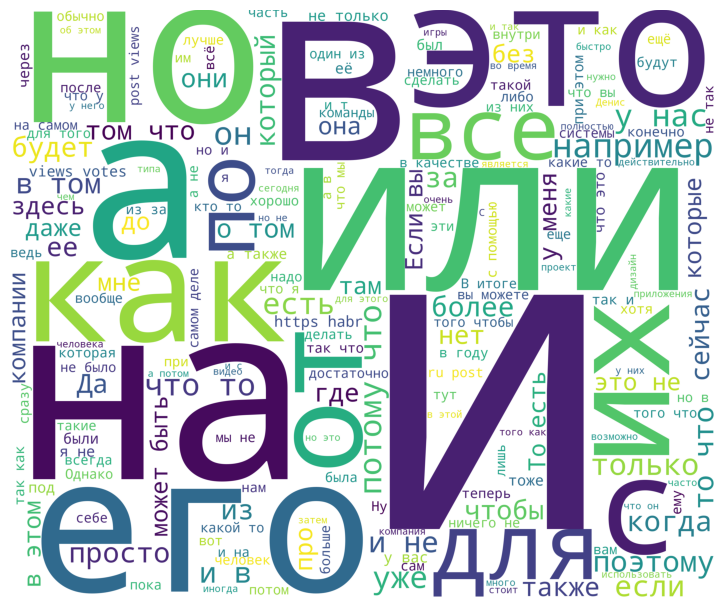

In [33]:
corpus = get_corpus(df['Текст'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

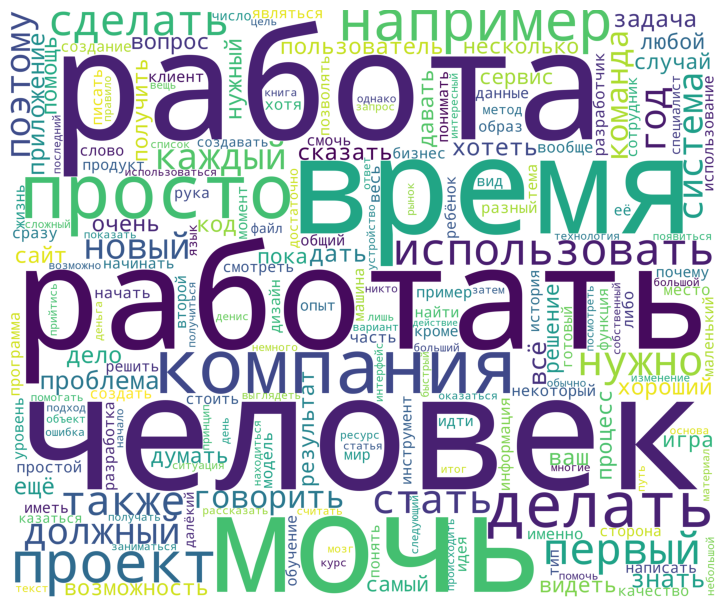

In [34]:
corpus = get_corpus(df['Лемматизированный текст'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [35]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

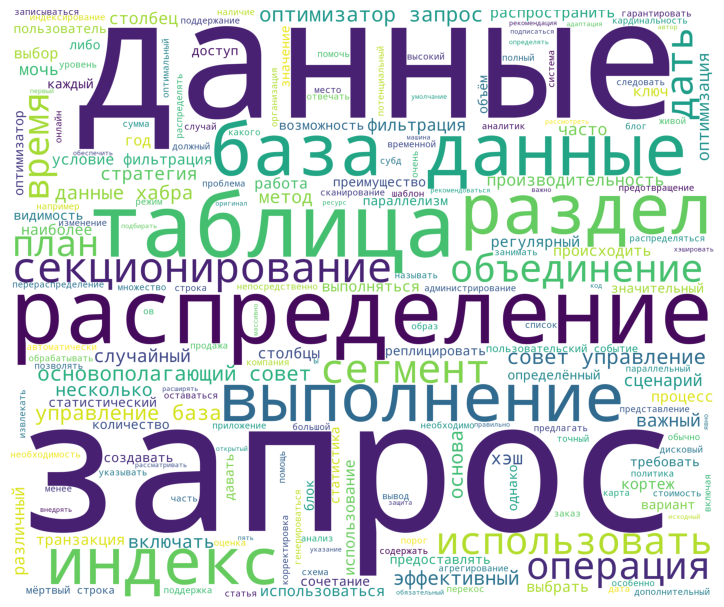

In [36]:
corpus = df['Лемматизированный текст'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

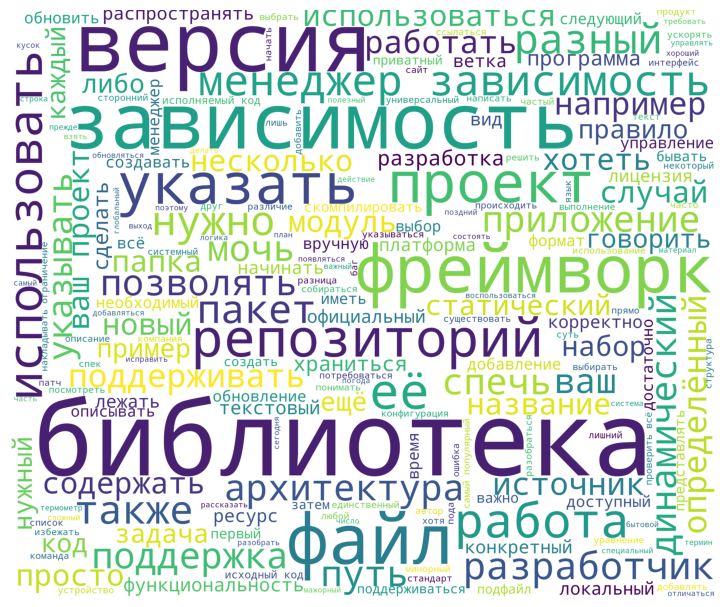

In [37]:
corpus = df['Лемматизированный текст'][1]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [38]:
df['Лемматизированный текст'][1]

'старший разработчик аня кочешкова рассказывать отличаться менеджер зависимость случай задача подойти иной материал полезный джуна специалист начать погружаться разработка специально подробно объяснять семантический версионирование устроить модуль код разница динамический статический библиотека менеджер зависимость нужный современный разработка зависимость написать код использоваться ваш программа добавление зависимость позволять воспользоваться сделать хороший работа избежать изобретение велосипед также лишний действие проектирование написание тестирование отладка поддержка определённый логика кусок логика называть пакет библиотека модуль сложный проект сторонний библиотека правда некоторый приложение мочь вообще отказываться использование библиотека разный версия мочь ссылаться друг друг накладывать ограничение версия работа проиллюстрировать бытовой пример телефон показать погода улица нужно встраивать термометр вытаскивать окно зашить специальный технология позволять связаться библ

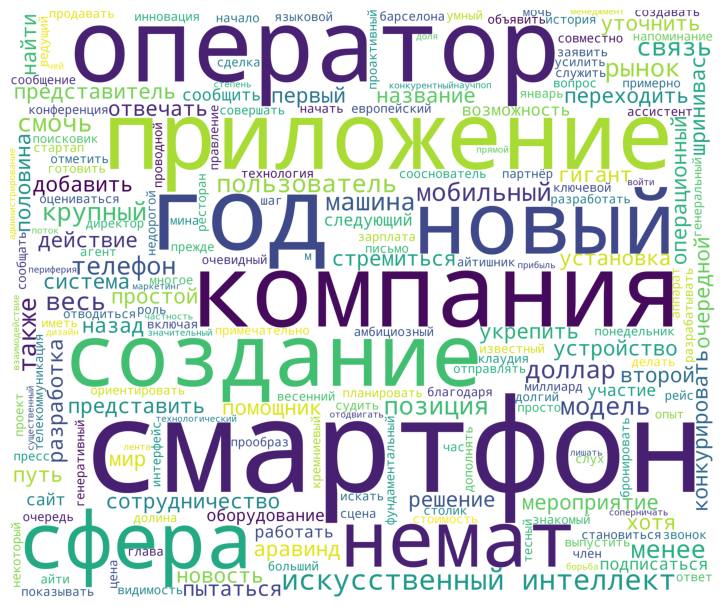

In [39]:
corpus = df['Лемматизированный текст'][2]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [40]:
df['Лемматизированный текст'][2]

'начало барселона очевидный хотя оператор представить амбициозный проект создание смартфон совместно ведущий компания сообщать готовить недорогой аппарат разработать тесный сотрудничество также партнёр дополнять новый приложение ассистент название планировать представить устройство второй половина год продавать начать м цена менее доллар уточнить представитель компания первый очередь модель ориентировать европейский рынок час назад объявить новый стоимость менее доллар мина искусственный интеллект смартфон зарплата айтишник найти весенний мероприятие айти… становиться компания заявить пресс конференция понедельник член правление отвечать технология инновация клаудия немат добавить оператор создавать фундаментальный больший языковой модель разрабатывать агент примечательно стартап кремниевый долина слух оцениваться примерно миллиард доллар отводиться ключевой роль создание смартфон показывать компания прежде известный благодаря генеративный поисковик делать шаг создание проактивный реше

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
df['Лемматизированный текст'][0]

'подписаться автор оригинал массивно‑параллельный база данные открытый исходный код аналитик случай ‑субд требовать регулярный оптимизация запрос корректировка распределение ресурс защита данные статья рассмотреть пять рекомендация обязательный эффективный управление правильно подбирать политика распределение данные рассматривать ‑адаптация расширять возможность внедрять операция параллелизм обеспечить параллельный выполнение запрос распределять дать множество машина называть сегмент предоставлять пользователь возможность выбрать метод распределение данные хэш случайный реплицировать распределение умолчание использовать хэш‑распределение пользователь создавать таблица указание метод распределение система автоматически распределять кортеж основа первый хэшировать столбец однако рекомендоваться явно определять политика распределение выбор хэш‑распределение важно выбрать столбец часто использоваться операция объединение основополагающий совет управление база данные средний мина блог компа

# Векторизация текстовых данных

In [43]:
vectorizer = CountVectorizer()
vectorizer.fit(df['Лемматизированный текст'])

CountVectorizer()

In [44]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['Лемматизированный текст'])

In [45]:
count_matrix.shape

(1162, 246363)

In [46]:
vectorizer.get_feature_names_out()[45000:46000]

array(['должный сопроводить', 'должный составить',
       'должный составить около', 'должный составлять',
       'должный состоять', 'должный состояться',
       'должный состояться следующий', 'должный сохранить',
       'должный социальный', 'должный спасти', 'должный спасти матушка',
       'должный специальный', 'должный специальный гравировка',
       'должный список', 'должный способ', 'должный способ убивать',
       'должный спрашивать', 'должный сработать', 'должный сразу',
       'должный ставить', 'должный стараться', 'должный стать',
       'должный степень', 'должный стоить', 'должный столько',
       'должный столько классный', 'должный стоять', 'должный страдать',
       'должный стремиться', 'должный строго', 'должный строить',
       'должный строить культура', 'должный строиться',
       'должный структура', 'должный структура вакансия',
       'должный суметь', 'должный сформировать', 'должный сформулировать',
       'должный сюда', 'должный сюда прийти', 'должный т

In [47]:
vectorizer.get_feature_names_out()[23360]

'время съёмка'

In [48]:
vectorizer.get_feature_names_out()[214518]

'сущность ключевой'

In [49]:
print(count_matrix)

  (0, 139376)	1
  (0, 535)	1
  (0, 123002)	1
  (0, 131139)	2
  (0, 4408)	15
  (0, 36046)	43
  (0, 126520)	1
  (0, 69344)	1
  (0, 74430)	1
  (0, 2495)	2
  (0, 198538)	2
  (0, 213760)	2
  (0, 221845)	3
  (0, 181537)	4
  (0, 122073)	5
  (0, 55706)	34
  (0, 80662)	2
  (0, 178893)	19
  (0, 183123)	1
  (0, 57510)	1
  (0, 210521)	2
  (0, 179623)	1
  (0, 171475)	1
  (0, 182589)	1
  (0, 118746)	1
  :	:
  (1161, 98581)	1
  (1161, 115162)	1
  (1161, 65078)	1
  (1161, 45868)	1
  (1161, 168303)	1
  (1161, 26118)	1
  (1161, 37564)	1
  (1161, 59954)	1
  (1161, 54676)	1
  (1161, 144180)	9
  (1161, 227517)	1
  (1161, 142408)	1
  (1161, 179756)	1
  (1161, 63437)	1
  (1161, 60822)	1
  (1161, 131921)	1
  (1161, 124397)	1
  (1161, 245335)	1
  (1161, 118744)	1
  (1161, 143250)	1
  (1161, 212752)	1
  (1161, 170876)	1
  (1161, 19625)	1
  (1161, 10725)	2
  (1161, 132744)	1


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [52]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Лемматизированный текст'])

CPU times: total: 54 s
Wall time: 57.8 s


In [53]:
tfidf_matrix.shape

(1162, 10000)

In [54]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['абзац', 'абсолютно', 'абсолютный', 'абстрагироваться',
       'абстрактный', 'абстракция', 'аварийный', 'авария', 'аватар',
       'август', 'август год', 'авиакомпания', 'авить', 'авто', 'автобус',
       'автомат', 'автоматизация', 'автоматизация тестирование',
       'автоматизированный', 'автоматизировать', 'автоматически',
       'автоматический', 'автомобиль', 'автомобильный', 'автономность',
       'автономный', 'автопилот', 'автор', 'автор книга', 'авторизация',
       'авторитет', 'авторитетный', 'авторский', 'авторский право',
       'автотест', 'ага', 'агент', 'агентство', 'агрегатор',
       'агрегатор такси', 'агрессивный', 'агрессия', 'ад', 'адаптация',
       'адаптер', 'адаптивный', 'адаптировать', 'адаптироваться',
       'адекватно', 'адекватный', 'адепт', 'админ', 'административный',
       'администратор', 'администрация', 'администрирование', 'админк',
       'адрес', 'адресовать', 'аж', 'аз', 'азиатский', 'азия', 'айти',
       'айтишник', 'айфон', 'академ

In [55]:
tfidf_vectorizer.get_feature_names_out()[1169]

'выражение'

In [56]:
tfidf_vectorizer.get_feature_names_out()[8060]

'случаться'

In [57]:
print(tfidf_matrix)

  (0, 5098)	0.02213758540563914
  (0, 3350)	0.014821080868553613
  (0, 8046)	0.02288144780662444
  (0, 4732)	0.019747929035712857
  (0, 1192)	0.03120374402260148
  (0, 6636)	0.0191372632927222
  (0, 4649)	0.013193951690930131
  (0, 2209)	0.02045912298100268
  (0, 9141)	0.02288144780662444
  (0, 3855)	0.01570372494194486
  (0, 3287)	0.021126371880483562
  (0, 7443)	0.02094967184290489
  (0, 6041)	0.01902482710537954
  (0, 4006)	0.04189934368580978
  (0, 6810)	0.02094967184290489
  (0, 6931)	0.017018229403590004
  (0, 5239)	0.031304997804537694
  (0, 1593)	0.02094967184290489
  (0, 7803)	0.012453127935091294
  (0, 5842)	0.021126371880483562
  (0, 9660)	0.02016048389862379
  (0, 7187)	0.02288144780662444
  (0, 3877)	0.02077990303152041
  (0, 1356)	0.021503004961853738
  (0, 4353)	0.02621647006369374
  :	:
  (1161, 2744)	0.006852904151037946
  (1161, 9658)	0.019383323820651274
  (1161, 469)	0.03397587151392425
  (1161, 1062)	0.007627574372231397
  (1161, 4774)	0.0441889256633548
  (1161, 5

# Кластеризаци

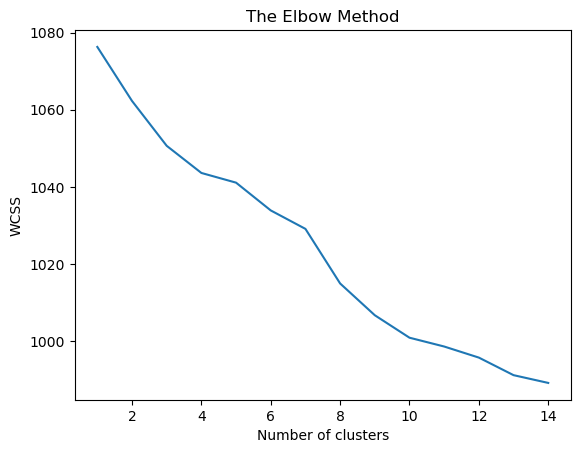

In [58]:
from sklearn.cluster import KMeans
X = tfidf_matrix
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
kmeans = KMeans(init='k-means++', n_clusters=12, n_init=28)
kmeans.fit(X)
pred=kmeans.fit_predict(X)

In [60]:
df['Кластер'] = pd.Series(pred)


In [61]:
df

Заголовок  \
0     предназначенная для организации хранилищ данны...   
1                 Cocoapods, Carthage, SPM: как выбрать   
2     как даже давние игроки видят в нем спасительно...   
3                                 Cloud4Y 5 часов назад   
4     работы. Инструмент достаточно пожилой (первый ...   
...                                                 ...   
1157  В центре внимания Java: Local Variable Type In...   
1158  Первые вызовы и много шуток: что скрыто в бесп...   
1159                          Мой путь к удаленке в Гоа   
1160  Единый механизм указания значений по умолчанию...   
1161  Введение в концепцию «потока» в левел-дизайне ...   

               Название компании  \
0                           OTUS   
1                  red_mad_robot   
2     Технократия @technokratiya   
3                        Cloud4Y   
4             Alex Kup @Lifailon   
...                          ...   
1157                   Axiom JDK   
1158            Яндекс Практикум   
1159               Online patent   
1160                       Флант   
1161                        OTUS   

                                               Описание  Рейтинг  \
0                  Цифровые навыки от ведущих экспертов   721.07   
1          №1 в разработке цифровых решений для бизнеса   117.94   
2                                           ИТ-Компания     4.40   
3                   #1 Корпоративный облачный провайдер    71.07   
4     источников журналов (не только файлов), поддер...     2.00   
...                                                 ...      ...   
1157                        на страже безопасности Java    75.61   
1158                               Помогаем людям расти   105.08   
1159                          Ваш личный патентный офис   290.95   
1160                 Специалисты по DevOps и Kubernetes   245.51   
1161               Цифровые навыки от ведущих экспертов   529.34   

                                              Категория            Дата  \
0                                                  OTUS   7 часов назад   
1                                         red_mad_robot   6 часов назад   
2                            Технократия @technokratiya             NaN   
3                                               Cloud4Y   5 часов назад   
4                                    Alex Kup @Lifailon             NaN   
...                                                 ...             ...   
1157  Программное обеспечение, Консалтинг и поддержк...      2025-04-28   
1158                        Веб-разработка, Веб-сервисы      2025-04-28   
1159                Консалтинг и поддержка, Веб-сервисы      2025-04-28   
1160  Программное обеспечение, Консалтинг и поддержк...      2025-04-28   
1161  Консалтинг и поддержка, Рекрутинг и HR, Произв...      2025-04-28   

                                                  Текст  Unnamed: 0  \
0     Подписаться Автор оригинала: Jingyu Wang Green...         NaN   
1     FAQ Старший iOS-разработчик Аня Кочешкова расс...         NaN   
2     Еще до начала MWC в Барселоне было очевидно, ч...         NaN   
3     Автор оригинала: Yashwant Singh Взлом Instagra...         NaN   
4     Всем привет! Я уже писал статью о различных сп...         NaN   
...                                                 ...         ...   
1157  Команда Axiom JDK подготовила перевод статьи п...        25.0   
1158  Привет! Это команда Яндекс Практикума. Первые ...        26.0   
1159  закат в АрамболеПривет, Habr! Меня зовут Ксени...        27.0   
1160  В Kubernetes важно правильно настроить Storage...        28.0   
1161  Методы проектирования эффективного потока уров...        29.0   

                                     Обработанный текст  \
0     подписаться автор оригинала это массивно‑парал...   
1      старший разработчик аня кочешкова рассказывае...   
2     еще до начала в барселоне было очевидно что хо...   
3     автор оригинала взлом ‑аккаунта популярный зап...   
4     всем привет я уже писал статью о

In [62]:
def get_cloudwords_by_claster(claster):
    claster_df = df[df['Кластер'] == claster]
    corpus = get_corpus(claster_df['Лемматизированный текст'].values)
    return WordCloud(background_color='white',
                          stopwords=STOPWORDS,
                          width=2500,
                          height=2000,
                          max_words=200,
                          random_state=42
                         ).generate(str_corpus(corpus))

			1 кластер


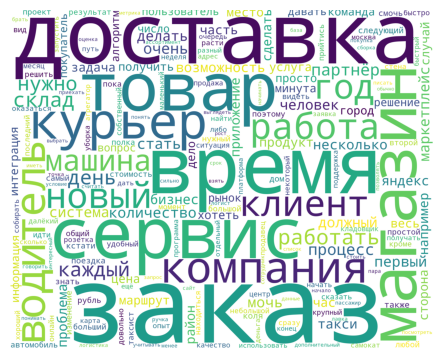

			2 кластер


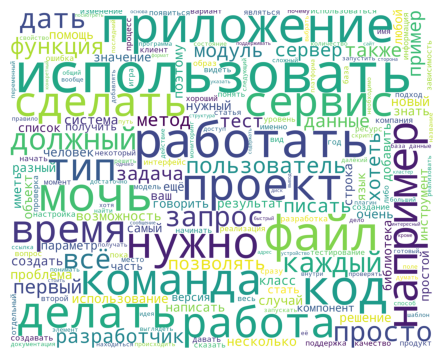

			3 кластер


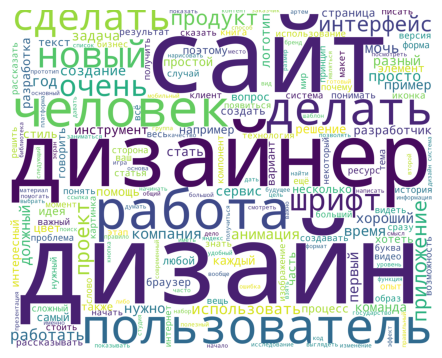

			4 кластер


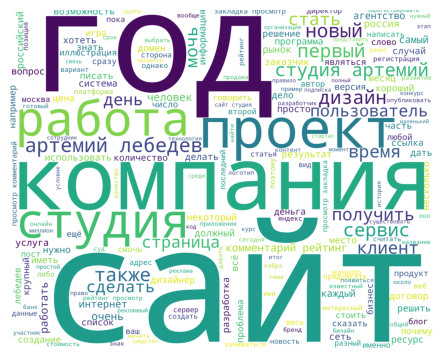

			5 кластер


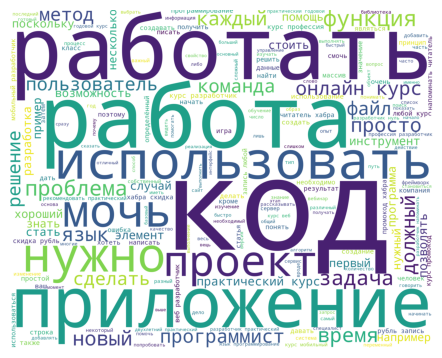

			6 кластер


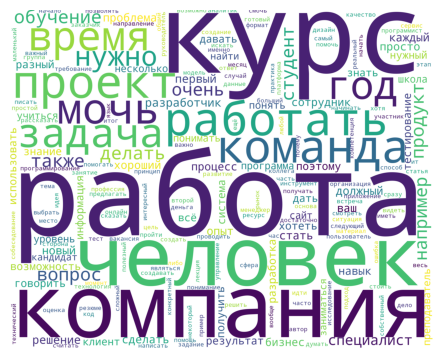

			7 кластер


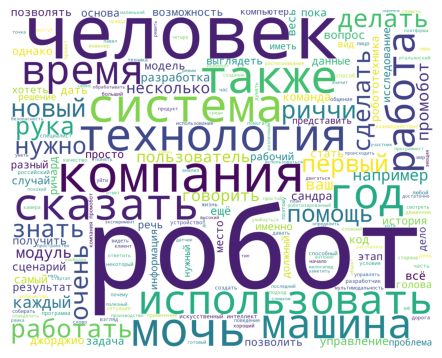

			8 кластер


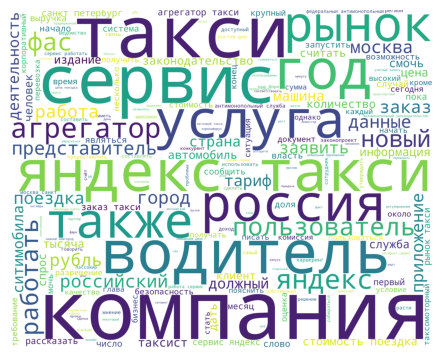

			9 кластер


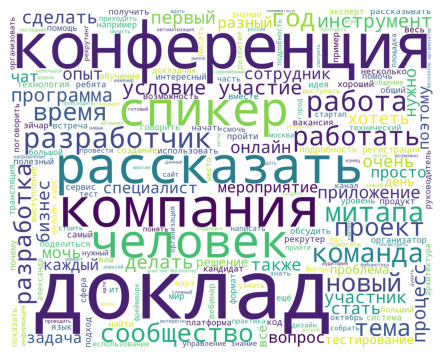

			10 кластер


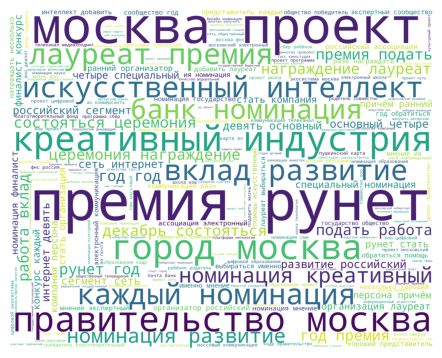

			11 кластер


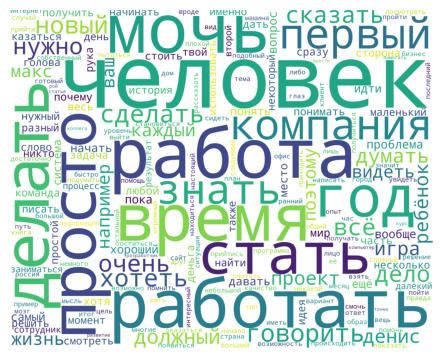

			12 кластер


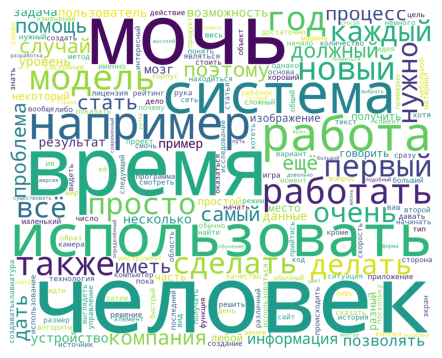

In [63]:
for i in range(df["Кластер"].nunique()):
    print(f"\t\t\t{i+1} кластер")
    cloud = get_cloudwords_by_claster(i)
    fig = plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

In [64]:
# Даем название
names = {0: "Обучение и Работа", 1: "Игры для детей", 2: "Разработка", 3: "Тур-Агенство", 4: "Трудоустройство", 5: "Работа в команде", 6: "Конференция", 7: "Разработка IT", 8: "Дизайнер IT", 9: "Человек и робот", 10: "Компания по доставке", 11: "Подкасты IT"}
def give_cluster_name():
    df["Категория кластера"] = df['Кластер'].map(names)
give_cluster_name()

In [65]:
df

Заголовок  \
0     предназначенная для организации хранилищ данны...   
1                 Cocoapods, Carthage, SPM: как выбрать   
2     как даже давние игроки видят в нем спасительно...   
3                                 Cloud4Y 5 часов назад   
4     работы. Инструмент достаточно пожилой (первый ...   
...                                                 ...   
1157  В центре внимания Java: Local Variable Type In...   
1158  Первые вызовы и много шуток: что скрыто в бесп...   
1159                          Мой путь к удаленке в Гоа   
1160  Единый механизм указания значений по умолчанию...   
1161  Введение в концепцию «потока» в левел-дизайне ...   

               Название компании  \
0                           OTUS   
1                  red_mad_robot   
2     Технократия @technokratiya   
3                        Cloud4Y   
4             Alex Kup @Lifailon   
...                          ...   
1157                   Axiom JDK   
1158            Яндекс Практикум   
1159               Online patent   
1160                       Флант   
1161                        OTUS   

                                               Описание  Рейтинг  \
0                  Цифровые навыки от ведущих экспертов   721.07   
1          №1 в разработке цифровых решений для бизнеса   117.94   
2                                           ИТ-Компания     4.40   
3                   #1 Корпоративный облачный провайдер    71.07   
4     источников журналов (не только файлов), поддер...     2.00   
...                                                 ...      ...   
1157                        на страже безопасности Java    75.61   
1158                               Помогаем людям расти   105.08   
1159                          Ваш личный патентный офис   290.95   
1160                 Специалисты по DevOps и Kubernetes   245.51   
1161               Цифровые навыки от ведущих экспертов   529.34   

                                              Категория            Дата  \
0                                                  OTUS   7 часов назад   
1                                         red_mad_robot   6 часов назад   
2                            Технократия @technokratiya             NaN   
3                                               Cloud4Y   5 часов назад   
4                                    Alex Kup @Lifailon             NaN   
...                                                 ...             ...   
1157  Программное обеспечение, Консалтинг и поддержк...      2025-04-28   
1158                        Веб-разработка, Веб-сервисы      2025-04-28   
1159                Консалтинг и поддержка, Веб-сервисы      2025-04-28   
1160  Программное обеспечение, Консалтинг и поддержк...      2025-04-28   
1161  Консалтинг и поддержка, Рекрутинг и HR, Произв...      2025-04-28   

                                                  Текст  Unnamed: 0  \
0     Подписаться Автор оригинала: Jingyu Wang Green...         NaN   
1     FAQ Старший iOS-разработчик Аня Кочешкова расс...         NaN   
2     Еще до начала MWC в Барселоне было очевидно, ч...         NaN   
3     Автор оригинала: Yashwant Singh Взлом Instagra...         NaN   
4     Всем привет! Я уже писал статью о различных сп...         NaN   
...                                                 ...         ...   
1157  Команда Axiom JDK подготовила перевод статьи п...        25.0   
1158  Привет! Это команда Яндекс Практикума. Первые ...        26.0   
1159  закат в АрамболеПривет, Habr! Меня зовут Ксени...        27.0   
1160  В Kubernetes важно правильно настроить Storage...        28.0   
1161  Методы проектирования эффективного потока уров...        29.0   

                                     Обработанный текст  \
0     подписаться автор оригинала это массивно‑парал...   
1      старший разработчик аня кочешкова рассказывае...   
2     еще до начала в барселоне было очевидно что хо...   
3     автор оригинала взлом ‑аккаунта популярный зап...   
4     всем привет я уже писал статью о

## Вывод

- Были подключены библиотеки, для работы с дата сетами
- 3 дата сета объединены в 1, для удобства работы обработки
- обработка дата сета
- отображение облака слов
- проделана класстеризация